# PM2.5 Levels in Urban vs. Rural Counties in California
#### By: Noli Angeles


## References
### Relevant Literature
1) World Health Organization. (2018). Ambient (outdoor) air quality and health.
<br>    Link: https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health

2) Health Effects Institute. (2020). State of Global Air 2020.
<br>    Link: https://www.stateofglobalair.org/

3) Pope, C. A., & Dockery, D. W. (2006). "Health Effects of Fine Particulate Air Pollution: Lines that Connect."

4) Dominici, F., et al. (2006). "Fine Particulate Air Pollution and Hospital Admission for Cardiovascular and Respiratory Diseases."

### Data Analysis
1) EPA Air Quality System (AQS) API
<br>    Link: https://aqs.epa.gov/aqsweb/documents/data_api.html

2) 2022 US Census Population Estimates
<br>    Link: https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/counties/totals/co-est2022-alldata.csv

3) US Census County and State shp files
<br>     County link: https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip
<br>     State link: https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip


4) ChatGPT (only for grabbing data from EPA AQS API)
<br> Help with API syntax by ChatGPT, February 27, 2025, OpenAI, https://chat.openai.com.

## Abstract
This project investigates the spatial variation of PM2.5 air pollution across urban and rural counties in California to assess how population density and county size influence air quality. Using data retrieved from the EPA Air Quality System API, the study aggregates annual PM2.5 measurements for selected urban counties (Los Angeles, San Francisco, San Diego, Orange, and Santa Clara) and rural counties (Inyo, Mono, Plumas, Siskiyou, and Mendocino) for 2019-2022. The approach involves computing weighted averages to account for differences in monitoring site density and sample size, followed by visualizations including choropleth maps, histograms, and pie charts to compare pollutant distributions. The analysis reaveals that there is no correletaion between population size and higher PM2.5 levels due to urbanization and instead finds that there is high PM2.5 levels per capita for smaller counties.


## Introduction
Air pollution, specifically particulate matter 2.5 (PM2.5), is a critical public health concern due to its established link to respiratory and cardiovascular diseases. PM2.5 is fine particulate matter that is 2.5 micrometers or less in diameter and is a common indicator for air pollution. It consists of particles such as sulfates, nitrates, dust, water, smoke, and much more. The World Health Organization (2018) emphasizes that ambient air pollution is responsible for millions of premature deaths globally, highlighting the urgency of monitoring and managing fine particulate matter. Pope and Dockery (2006) provide a comprehensive review of epidemiological studies connecting long-term PM2.5 exposure to increased mortality, while Dominici et al. (2006) demonstrate that even short-term exposure can significantly elevate hospital admissions for respiratory and cardiovascular conditions. These studies collectively underscore the adverse health impacts of PM2.5 and motivate the need for spatially detailed analyses. In response, recent research has focused on identifying geographic patterns of air quality and their relationship with urbanization and land use. However, few studies have directly compared rural and urban regions within a single state such as California, where diverse demographic and industrial factors can lead to significant variations in pollutant levels. This study aims to compare long-term PM2.5 exposure across selected urban and rural counties in California, integrating air quality data with population estimates and health outcome indicators. By focusing on annual averages, we capture the cumulative burden of exposure, which, when combined with recent epidemiological evidence, reinforces the need for targeted regulatory actions. At the same time, we acknowledge that short-term variations provide important context for acute health impacts, and our analysis discusses these nuances where appropriate.

## Methods
### Data Collection
Air quality data were obtained from the EPA Air Quality System (AQS) API for PM2.5 measurements across California for the years 2019–2023. The data were collected at the monitoring site level and include key variables such as county, state, year, arithmetic mean (daily average PM2.5), sample duration, pollutant standard, metric used, method, site number, and geographic coordinates. In parallel, county-level population estimates for 2019 and 2020–2022 as well as the California county shp files were downloaded from the U.S. Census Bureau datasets.

### Data Cleaning and Merging
Data cleaning was performed by checking for duplicate values, any NaN/null values, and dropping columns not needed for analysis. Afterwards, the all three datasets (PM25 for years 2019-2022, population data for 2019-2022, and California county shp.) were merged by creating a 'FIPS' code number.

### Data Processing and Filtering
Data processing was performed in Python using the Pandas and GeoPandas libraries. To ensure consistency across the dataset, we applied several filtering criteria:

**Sample Duration**: Records were restricted to those with sample durations reported as either '24 HOUR' or '24-HR BLK AVG'.
<br>
**Pollutant Standard**: Only measurements meeting the 'PM25 24-hour' standard were retained.
<br>
**Metric Used**: We filtered the data to include only those records where the metric used was 'Daily Mean'.
<br>
**Method**: While multiple measurement methods were recorded, we retained all methods to maximize data availability.
No duplicate rows were found.

### Data Aggregation and Integration
Given that multiple monitoring sites and repeated measurements exist within counties, the data were aggregated to produce one representative PM2.5 value per county. This was achieved by computing the arithmetic mean of the daily values for each county. The aggregated PM2.5 data were then merged with the population datasets using county identifiers (such as county name or FIPS code). This integration allowed us to incorporate demographic context into the analysis and enabled comparisons between air quality levels and population metrics.

### Geospatial and Statistical Analysis
The aggregated county-level air quality data were joined with a California counties shapefile obtained from the U.S. Census Bureau. GeoPandas and Contextily were used to create choropleth maps that visualize the spatial distribution of long-term PM2.5 exposure across California. Additionally, scatterplots were generated to examine the relationship between county-level PM2.5 averages and population estimates, providing insights into how population density might correlate with air quality. To statistically assess differences between urban and rural counties, counties were classified based on demographic and geographic criteria, and correlation tests were performed to determine if observed differences in PM2.5 levels were significant.

### Incorporating Population Data
Population estimates from 2019 and 2020–2022 were used both as an independent variable and as a normalization factor. By merging the population data with the aggregated PM2.5 measurements, we were able to calculate population density and assess its association with air quality. This integration facilitates analysis of whether counties with higher populations tend to experience higher or lower PM2.5 levels, and it allows for a more nuanced understanding of the environmental and public health impacts.

## Results and Discussion

### Distribution of data points for each county

county
Los Angeles      324
Inyo             200
San Diego        180
Mono             128
Plumas            72
Orange            64
Santa Clara       64
Mendocino         36
Siskiyou          24
San Francisco     16
Name: count, dtype: int64

county_category
urban    648
rural    460
Name: count, dtype: int64


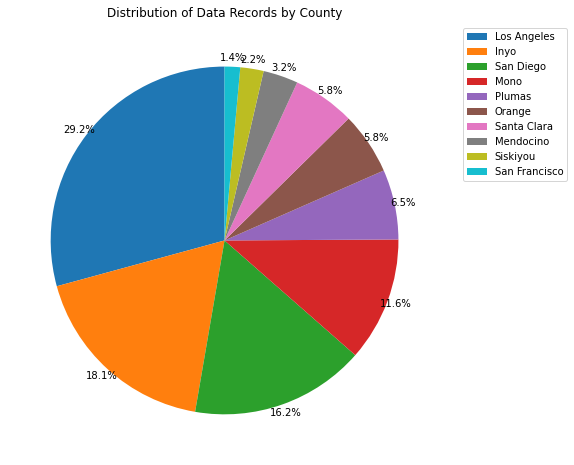

In [40]:
# pie chart of how many records each county has
county_counts = filtered_pm['county'].value_counts()

category_counts = filtered_pm['county_category'].value_counts()
# show counts for each county
print(county_counts)
print()
print(category_counts)

plt.figure(figsize=(8,8))
plt.pie(county_counts, autopct='%1.1f%%', startangle=90, pctdistance=1.05)
plt.title('Distribution of Data Records by County')
plt.legend(county_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()
# we can fix the formatting of the pie chart later

There is a skewed distribution in number of observations for each county. To counteract this, we will use PM2.5 levels per capita to get a better understanding of population vs. PM2.5 levels.

In [41]:
print(filtered_pm['arithmetic_mean'].describe())
print()
print(filtered_pm.groupby('county')['arithmetic_mean'].mean().sort_values(ascending=False))

count    1108.000000
mean       10.783836
std         5.718894
min         2.613333
25%         7.685714
50%         9.925000
75%        12.496694
max        40.764417
Name: arithmetic_mean, dtype: float64

county
Plumas           15.662215
Mono             12.941654
Los Angeles      11.837702
Orange           10.025068
San Diego         9.311438
Santa Clara       9.087330
Mendocino         8.999711
Inyo              8.839662
Siskiyou          8.709729
San Francisco     8.040952
Name: arithmetic_mean, dtype: float64


Looking at the descriptive statistics, we can see that the average PM2.5 level is around 10.7 which is considered "Good" according to the following AQI Categories...

In [42]:
display(pm25_levels)

,PM2.5_Concentration_µg/m³,AQI_Category,Health_Concern_Level
0,0.0 – 12.0,Good,Little to no risk
1,12.1 – 35.4,Moderate,Some risk for sensitive groups
2,35.5 – 55.4,Unhealthy for Sensitive Groups,Increased risk for sensitive individuals
3,55.5 – 150.4,Unhealthy,Risk for the general population
4,150.5 – 250.4,Very Unhealthy,Health warnings issued
5,250.5+,Hazardous,Emergency conditions


Already we can see that Plumas and Mono counties (rural counties) have a higher PM2.5 average than urban counties. This goes against my idea that higher population density leads to higher PM2.5 levels (due urbanization: traffic congestion, industrial activity) to on average. The higher average PM2.5 levels in rural counties (where more nature is present) leads me to believe something is affecting these regions and I'm assuming it has something to do with wildfires (which has a significant impact on air pollution)

### Distribution on PM2.5 Levels

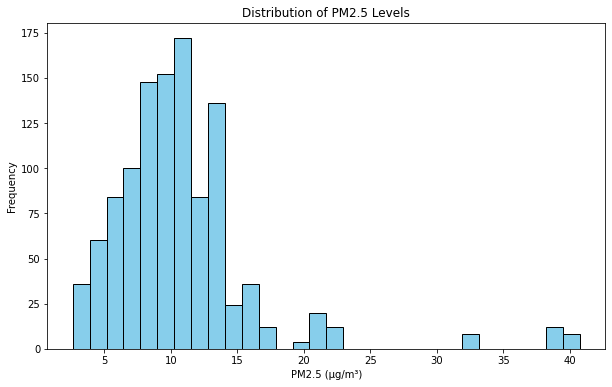

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_pm['arithmetic_mean'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Levels')
plt.show()

<Figure size 864x432 with 0 Axes>

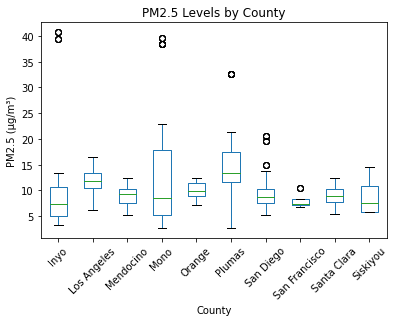

In [47]:
plt.figure(figsize=(12, 6))
filtered_pm.boxplot(column='arithmetic_mean', by='county', grid=False)
plt.xlabel('County')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 Levels by County')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()

When looking at the distribution of PM2.5 levels for each county, we can see that rural counties (Inyo, Mendocino, Mono, Plumas, and Siskiyou) have bigger boxes showing more variation of data.

<Figure size 864x432 with 0 Axes>

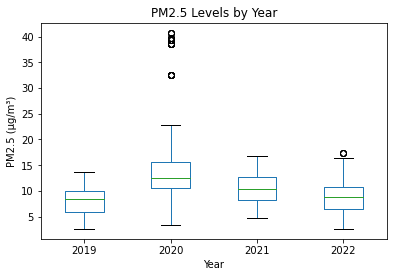

In [48]:
plt.figure(figsize=(12, 6))
filtered_pm.boxplot(column='arithmetic_mean', by='year', grid=False)
plt.xlabel('Year')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 Levels by Year')
plt.suptitle('')
plt.show()

Despite the pandemic in 2020 and everyone staying at home for a long period of time, the PM2.5 levels were higher and varied a lot than other years. A quick google research shows that there was indeed raging wildfires during lockdown. This can explain the bigger box plot and outliers for the year 2020.

### Population Plots

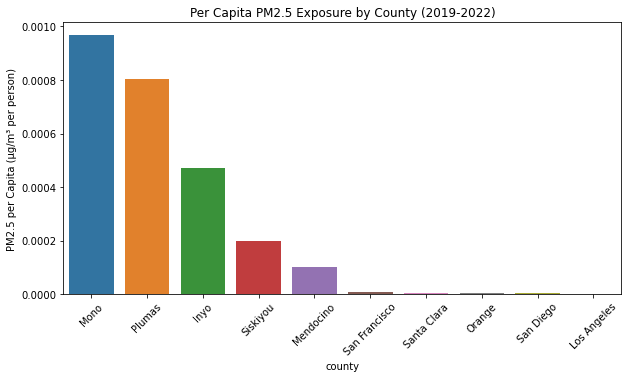

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(data=county_pm25_pop, x='county', y='pm_per_capita', order=county_pm25_pop.sort_values('pm_per_capita', ascending=False)['county'])
plt.xticks(rotation=45)
plt.ylabel('PM2.5 per Capita (µg/m³ per person)')
plt.title('Per Capita PM2.5 Exposure by County (2019-2022)')
plt.show()

We normalize the population data and use per capita in order to account for the highly imbalanced number of observations for counties. This bar plot compares PM2.5 per capita across all counties and we can see a disproportionate exposure per person in smaller counties. Something is affecting this disproportion and this solidifies my suspicion of wildfires having an extreme influence on PM2.5 levls in these rural counties.

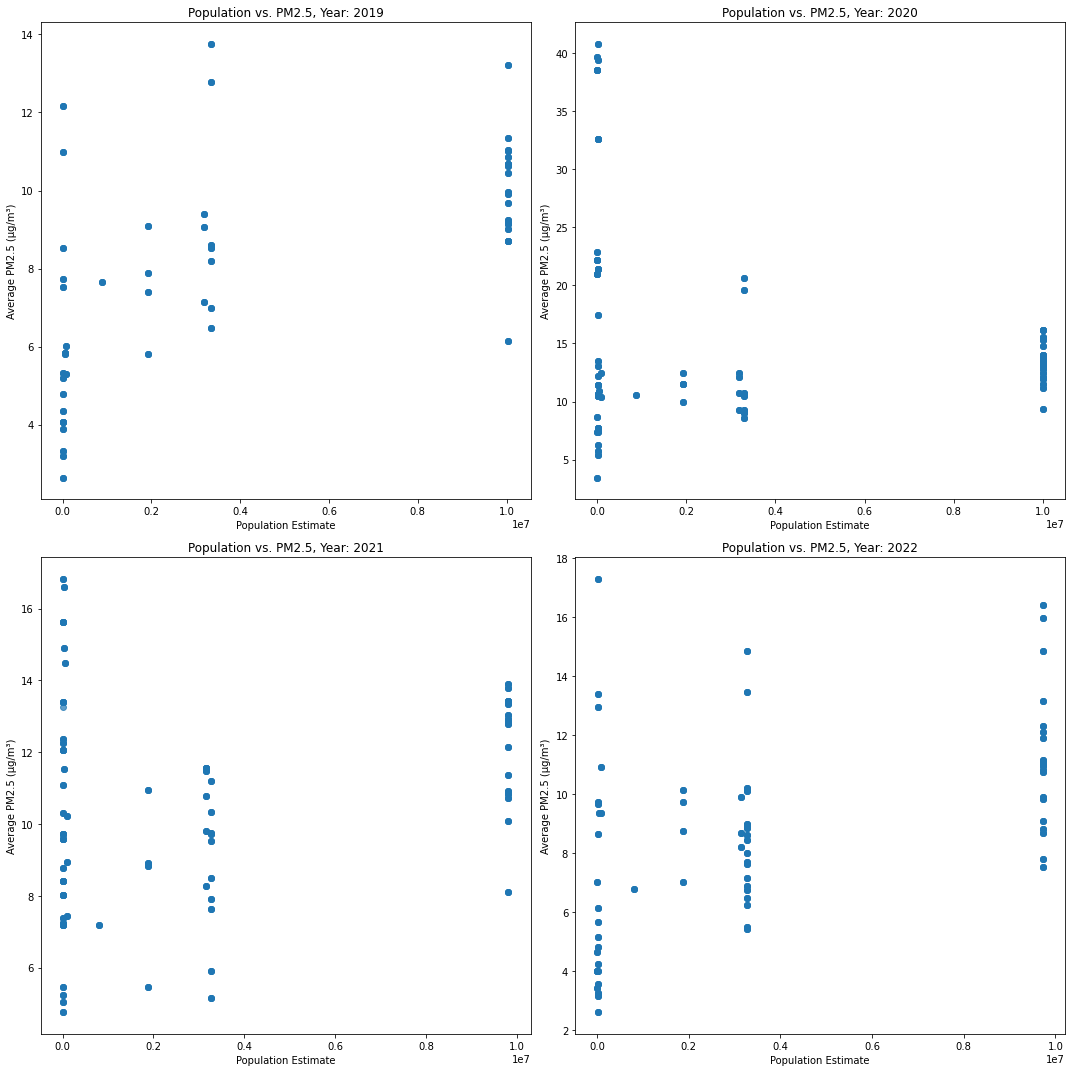

In [50]:
years = sorted(pop_df['year'].unique())
fig, axes = plt.subplots(2,2, figsize=(15, 15))
axes = axes.flatten()

for i, yr in enumerate(years):
    subset = pop_df[pop_df['year'] == yr]
    axes[i].scatter(subset['POPESTIMATE'], subset['arithmetic_mean'], alpha=0.7)
    axes[i].set_title(f'Population vs. PM2.5, Year: {yr}')
    axes[i].set_xlabel('Population Estimate')
    axes[i].set_ylabel('Average PM2.5 (µg/m³)')

plt.tight_layout()
plt.show()

If we look at 2020 we can see where population estimate is around 1 million, and it has lower average PM2.5 levels due to the pandemic. Looking at the lower populated counties in the same year, the highest reading reaches 40.

### Geospatial Plots

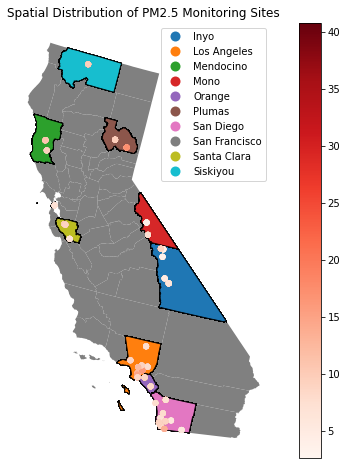

In [51]:
# convert the dataframe to a GeoDataFrame using latitude and longitude
geometry = [Point(xy) for xy in zip(filtered_pm['longitude'], filtered_pm['latitude'])]
gdf = gpd.GeoDataFrame(filtered_pm, geometry=geometry, crs='EPSG:4326')

gdf = gdf.to_crs(epsg=5070)
fig, ax = plt.subplots(figsize=(10, 8))
cali_county_shp.plot(ax=ax, color='gray')
filtered_pm.plot(ax=ax, column='county', linewidth=0.8, edgecolor='black', legend=True)
gdf.plot(ax=ax, column='arithmetic_mean', cmap='Reds', markersize=25, alpha=0.7, legend=True)

ax.set_title('Spatial Distribution of PM2.5 Monitoring Sites')
ax.set_axis_off()
plt.show()

In addition to the skewed counts for rural and urban county observations, we can also see an unbalanced distribution of number of monitoring sites for each county.

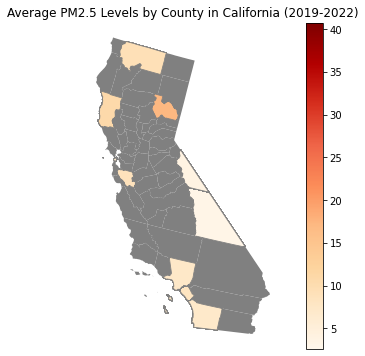

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
cali_county_shp.plot(ax=ax, color='gray')
filtered_pm.plot(column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='gray', legend=True, ax=ax)
ax.set_title('Average PM2.5 Levels by County in California (2019-2022)')
ax.set_axis_off()
plt.show()

If we take all of PM2.5 values for each county into account, we can see that they are pretty good readings (below 20, with the exception of Plumas county). Later we'll do some statistical tests to see if we can find a correlation between these variables (population and PM2.5)

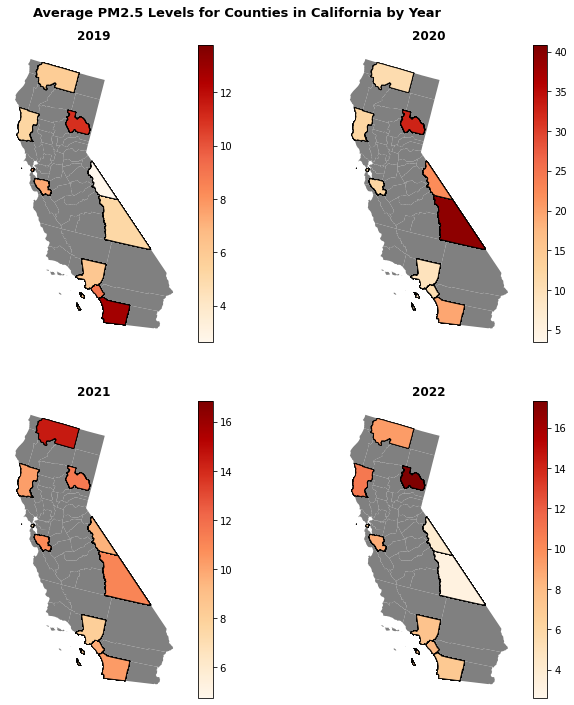

In [53]:
fig, ax1 = plt.subplots(2,2, figsize=(12, 12))
ax1 = ax1.flatten()
# plots county lines and take of axes
ax1[0].set_axis_off()
ax1[1].set_axis_off()
ax1[2].set_axis_off()
ax1[3].set_axis_off()

cali_county_shp.plot(ax=ax1[0], color='gray')
cali_county_shp.plot(ax=ax1[1], color='gray')
cali_county_shp.plot(ax=ax1[2], color='gray')
cali_county_shp.plot(ax=ax1[3], color='gray')

# plot 2019 PM2.5 data
gdf_pm_2019 = filtered_pm.loc[filtered_pm['year'] == 2019]
gdf_pm_2019.plot(ax=ax1[0], column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
ax1[0].set_title('2019', fontweight='bold')

# plot 2020 PM2.5 data
gdf_pm_2020 = filtered_pm.loc[filtered_pm['year'] == 2020]
gdf_pm_2020.plot(ax=ax1[1], column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
ax1[1].set_title('2020', fontweight='bold')

# plot 2021 PM2.5 data
gdf_pm_2021 = filtered_pm.loc[filtered_pm['year'] == 2021]
gdf_pm_2021.plot(ax=ax1[2], column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
ax1[2].set_title('2021', fontweight='bold');

# plot 2022 PM2.5 data
gdf_pm_2022 = filtered_pm.loc[filtered_pm['year'] == 2022]
gdf_pm_2022.plot(ax=ax1[3], column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
ax1[3].set_title('2022', fontweight='bold');

# Titles and labels
plt.suptitle('Average PM2.5 Levels for Counties in California by Year', fontweight='bold', y=.925, fontsize=13);

plt.subplots_adjust(wspace=0)

## Conclusion

In [56]:
correlation = pop_df['POPESTIMATE'].corr(pop_df['arithmetic_mean'])
print('Correlation between population and PM2.5:', correlation)

for yr in years:
    subset = pop_df[pop_df['year'] == yr]
    corr = subset['POPESTIMATE'].corr(subset['arithmetic_mean'])
    print(f'Correlation between population and PM2.5 for {yr}: {corr:.2f}')

Correlation between population and PM2.5: 0.08038836191059788
Correlation between population and PM2.5 for 2019: 0.62
Correlation between population and PM2.5 for 2020: -0.18
Correlation between population and PM2.5 for 2021: 0.29
Correlation between population and PM2.5 for 2022: 0.50


This study examined the relationship between long-term PM2.5 exposure and population distribution across counties in California from 2019 to 2022, using air quality data from the EPA and population estimates from the U.S. Census Bureau. While initial expectations suggested a potential correlation between population size and higher PM2.5 levels due to urban emissions, the analysis did not reveal a strong or consistent relationship between these variables.

One key factor influencing this outcome is the presence of wildfires, which disproportionately affect rural and less populated counties. While urban areas like Los Angeles and San Diego consistently reported moderately higher PM2.5 levels due to vehicular and industrial emissions, smaller counties such as Plumas, Mono, and Inyo also exhibited elevated PM2.5 concentrations, likely due to wildfire events. This suggests that population alone is not the primary determinant of PM2.5 exposure in California—regional environmental conditions, including wildfire frequency and topography, play a significant role.

Key Takeaways
- PM2.5 exposure is not solely driven by population size... smaller counties with frequent wildfires can experience higher average pollution levels than major urban centers.

- Wildfires significantly impact annual PM2.5 levels, highlighting the need for further research on seasonal variations and episodic pollution spikes.

- Future research should integrate wildfire incident data to better assess the interplay between natural and anthropogenic sources of PM2.5.

Although this study focused on long-term exposure, short-term spikes in PM2.5 from wildfires remain an important public health concern. Understanding these dynamics can help guide targeted air quality policies and public health interventions in both urban and wildfire-prone rural areas. 

## Code Appendix

### Import Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import time
from shapely.geometry import Point

# display all columns in df
pd.set_option('display.max_columns', None)

### Grab PM2.5 data from EPA Air Quality System (AQS) API for 2019-2022

In [4]:
### grab data from EPA Air Quality System (AQS) API
email = 'naangele@asu.edu'   
api_key = 'indigoswift16'  

# EPA AQS API base URL for annual data by county
base_url = 'https://aqs.epa.gov/data/api/annualData/byCounty'

# list of years to loop over
years = [2019, 2020, 2021, 2022]

# define common parameters
param = '88101'      # parameter code for PM2.5
state = '06'         # California's FIPS code
sample_duration = '24-HR BLK AVG'
metric_used = 'Daily Mean'

# lists of counties for urban and rural samples (FIPS codes as strings with leading zeros)
urban_counties = ['037', '075', '073', '059', '085']
rural_counties = ['027', '051', '063', '093', '045']

# combine them for a loop and store a label for urban vs. rural
counties = [(county, 'urban') for county in urban_counties] + [(county, 'rural') for county in rural_counties]

for year in years:
    print(f"--- Processing Year: {year} ---")
    # set the beginning and end dates for the year
    bdate = f"{year}0101"  # January 1 of the current year
    edate = f"{year}1231"  # December 31 of the current year
    
    year_data = []  # initialize list to store data for this year
    
    # loop over each county in the combined list
    for county, category in counties:
        params_dict = {
            'email': email,
            'key': api_key,
            'param': param,
            'bdate': bdate,
            'edate': edate,
            'state': state,
            'county': county
        }
        
        print(f'Fetching data for county FIPS {county} ({category}) in {year}...')
        response = requests.get(base_url, params=params_dict)
        
        if response.status_code == 200:
            data = response.json()
            header = data.get('Header', [{}])[0]
            if header.get('status') == 'Success' and 'Data' in data:
                for entry in data['Data']:
                    entry['county_category'] = category
                    entry['year'] = year  # record the year in the data
                    year_data.append(entry)
        
        time.sleep(1)  # pause to respect API rate limits
    
    # after processing all counties for the year, save the data if any was collected
    if year_data:
        df_year = pd.DataFrame(year_data)
        output_filename = f'pm25_california_{year}.csv'
        df_year.to_csv(output_filename, index=False)
        print(f'Data for {year} saved to {output_filename}.')
    else:
        print(f'No data fetched for {year}.')

--- Processing Year: 2019 ---
Fetching data for county FIPS 037 (urban) in 2019...
Fetching data for county FIPS 075 (urban) in 2019...
Fetching data for county FIPS 073 (urban) in 2019...
Fetching data for county FIPS 059 (urban) in 2019...
Fetching data for county FIPS 085 (urban) in 2019...
Fetching data for county FIPS 027 (rural) in 2019...
Fetching data for county FIPS 051 (rural) in 2019...
Fetching data for county FIPS 063 (rural) in 2019...
Fetching data for county FIPS 093 (rural) in 2019...
Fetching data for county FIPS 045 (rural) in 2019...
Data for 2019 saved to pm25_california_2019.csv.
--- Processing Year: 2020 ---
Fetching data for county FIPS 037 (urban) in 2020...
Fetching data for county FIPS 075 (urban) in 2020...
Fetching data for county FIPS 073 (urban) in 2020...
Fetching data for county FIPS 059 (urban) in 2020...
Fetching data for county FIPS 085 (urban) in 2020...
Fetching data for county FIPS 027 (rural) in 2020...
Fetching data for county FIPS 051 (rural) i

### Clean/Process/Munge PM2.5 Datasets

In [5]:
# 2019 pm2.5 data
pm2019 = pd.read_csv('pm25_california_2019.csv')

# add FIPS code for merging later
pm2019['FIPS'] = pm2019.state_code.astype(str).str.zfill(2) + pm2019.county_code.astype(str).str.zfill(3)

# drop columns in 2019 pm data
pm_cols = ['county', 'state', 'year', 'arithmetic_mean', 'sample_duration', 'pollutant_standard', 'metric_used', 
           'method', 'site_number', 'event_type', 'units_of_measure', 'latitude', 'longitude', 'county_category', 'FIPS']

pm2019 = pm2019[pm_cols]

In [6]:
# 2020 pm2.5 data
pm2020 = pd.read_csv('pm25_california_2020.csv')

# add FIPS code for merging later
pm2020['FIPS'] = pm2020.state_code.astype(str).str.zfill(2) + pm2020.county_code.astype(str).str.zfill(3)

# drop columns in 2020 pm data
pm2020 = pm2020[pm_cols]

In [7]:
# 2021 pm2.5 data
pm2021 = pd.read_csv('pm25_california_2021.csv')

# add FIPS code for merging later
pm2021['FIPS'] = pm2021.state_code.astype(str).str.zfill(2) + pm2021.county_code.astype(str).str.zfill(3)

# drop columns in 2021 pm datab
pm2021 = pm2021[pm_cols]

In [8]:
# 2021 pm2.5 data
pm2022 = pd.read_csv('pm25_california_2022.csv') 

# create FIPS code
pm2022['FIPS'] = pm2022.state_code.astype(str).str.zfill(2) + pm2022.county_code.astype(str).str.zfill(3)

# drop columns in 2022 pm
pm2022 = pm2022[pm_cols]

### Concatenate (Merge) All PM2.5 Data (2019-2022)

In [9]:
# start merging (concat) 2019 with 2020 PM data
pm = pd.concat([pm2019, pm2020, pm2021, pm2022], ignore_index=True)
print(pm.shape)
pm.head()

(2390, 15)


,county,state,year,arithmetic_mean,sample_duration,pollutant_standard,metric_used,method,site_number,event_type,units_of_measure,latitude,longitude,county_category,FIPS
0,Los Angeles,California,2019,10.675453,1 HOUR,NaN,Observed Values,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,4004,No Events,Micrograms/cubic meter (LC),33.792360,-118.175330,urban,06037
1,Los Angeles,California,2019,13.271887,1 HOUR,NaN,Observed Values,Thermo Scientific 5014i or FH62C14-DHS w/VSCC ...,4008,No Events,Micrograms/cubic meter (LC),33.859662,-118.200707,urban,06037
2,Los Angeles,California,2019,6.174326,1 HOUR,NaN,Observed Values,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,9033,No Events,Micrograms/cubic meter (LC),34.669739,-118.130511,urban,06037
3,Los Angeles,California,2019,8.703279,24 HOUR,PM25 24-hour 2006,Daily Mean,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2,No Events,Micrograms/cubic meter (LC),34.136500,-117.923910,urban,06037
4,Los Angeles,California,2019,8.703279,24 HOUR,PM25 Annual 2006,Quarterly Means of Daily Means,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2,No Events,Micrograms/cubic meter (LC),34.136500,-117.923910,urban,06037


### California State Line shp. file

In [10]:
### grab state shp file
url_state = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'
state_gdf = gpd.read_file(url_state)
cali_shp = state_gdf[state_gdf['STATEFP'] == '06']
cali_shp = cali_shp.to_crs(5070)

### California Counties Boudaries shp file

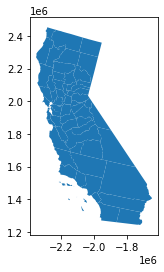

In [11]:
### grab county shp file
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'
county_gdf = gpd.read_file(url_county)
cali_county_shp = county_gdf[county_gdf['STATEFP'] == '06']
cali_county_shp = cali_county_shp.to_crs(5070)
cali_county_shp.plot()

# create fips code
cali_county_shp['FIPS'] = cali_county_shp.STATEFP + cali_county_shp.COUNTYFP

### Loading and Cleaning 2019 US Census Population Data with 2020-2022 Data

In [12]:
### load 2019 population data
pop_url_2019 = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
df2019 = pd.read_csv(pop_url_2019, encoding="ISO-8859-1", engine='python')

# data cleaning for 2019 data
selected_cols = ['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2019']
df2019 = df2019[selected_cols]

# create FIPS
df2019['FIPS'] = df2019.STATE.astype(str).str.zfill(2) + df2019.COUNTY.astype(str).str.zfill(3)

# filter to only California counties
df2019 = df2019[df2019['STATE'] == 6]


### load 2020-2022 population data
pop_url_2020 = 'https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/counties/totals/co-est2022-alldata.csv'
df2020 = pd.read_csv(pop_url_2020, encoding="ISO-8859-1", engine='python') # load up data

# data cleaning for 2020-2022 data
selected_cols2 = ['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']
df2020 = df2020[selected_cols2]

# create FIPS
df2020['FIPS'] = df2020.STATE.astype(str).str.zfill(2) + df2020.COUNTY.astype(str).str.zfill(3)

# filter to only California counties
df2020 = df2020[df2020['STATE'] == 6]

### Merging Population Data (2019-2022)

In [13]:
cali_population = df2020.merge(df2019, left_on='FIPS', right_on='FIPS', how='left', suffixes=('', '_drop'))
cali_population = cali_population.drop(columns=[col for col in cali_population.columns if '_drop' in col])
print(cali_population.shape)
cali_population.head()

(59, 9)


,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,FIPS,POPESTIMATE2019
0,6,0,California,California,39501653,39142991,39029342,06000,39512223
1,6,1,California,Alameda County,1680380,1643837,1628997,06001,1671329
2,6,3,California,Alpine County,1204,1235,1190,06003,1129
3,6,5,California,Amador County,40532,41144,41412,06005,39752
4,6,7,California,Butte County,210135,206190,207303,06007,219186


### Merging `cali_county_shp` and `cali_population` together

In [14]:
# now we can merge
cali_pop = cali_county_shp.merge(cali_population, left_on='FIPS', right_on='FIPS', how='left')

# and check the geodf to see if it merged properly
cali_pop.shape
cali_pop.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry', 'FIPS', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022',
       'POPESTIMATE2019'],
      dtype='object')

### Merging `cali_pop` with `pm`

In [15]:
pm25 = cali_pop.merge(pm, left_on='FIPS', right_on='FIPS', how='left')
print(pm25.columns)
print()
print(pm25['FIPS'].unique())

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry', 'FIPS', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022',
       'POPESTIMATE2019', 'county', 'state', 'year', 'arithmetic_mean',
       'sample_duration', 'pollutant_standard', 'metric_used', 'method',
       'site_number', 'event_type', 'units_of_measure', 'latitude',
       'longitude', 'county_category'],
      dtype='object')

['06059' '06111' '06063' '06015' '06023' '06043' '06037' '06065' '06101'
 '06113' '06033' '06039' '06099' '06081' '06041' '06079' '06007' '06021'
 '06095' '06001' '06061' '06055' '06057' '06069' '06077' '06013' '06103'
 '06089' '06107' '06071' '06097' '06025' '06027' '06053' '06093' '06017'
 '06003' '06047' '06005' '06009' '06085' '06087' '06083' '06051' '06073'
 '06105' '06019' '06011' '06045' '06029' '06049' '06031' '06075' '06067'
 '06035' '0611

### Cleaning, Processing, and Filtering `pm25`

In [16]:
### filter out only the counties we need
include_list = ['06037', '06075', '06073', '06059', '06085', '06027', '06051', '06063', '06093', '06045']
pm25 = pm25.loc[pm25['FIPS'].isin(include_list)]
pm25['FIPS'].unique()

array(['06059', '06063', '06037', '06027', '06093', '06085', '06051',
       '06073', '06045', '06075'], dtype=object)

In [17]:
### keep certain columns for our dataset
keep_cols = ['STATEFP', 'COUNTYFP', 'FIPS', 'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER', 'geometry',
            'POPESTIMATE2019', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'STNAME', 'county',
            'year', 'arithmetic_mean', 'sample_duration', 'pollutant_standard', 'metric_used', 'method',
            'site_number', 'event_type', 'units_of_measure', 'latitude',
            'longitude', 'county_category']

pm25 = pm25[keep_cols]
pm25.head()

,STATEFP,COUNTYFP,FIPS,AFFGEOID,GEOID,LSAD,ALAND,AWATER,geometry,POPESTIMATE2019,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,STNAME,county,year,arithmetic_mean,sample_duration,pollutant_standard,metric_used,method,site_number,event_type,units_of_measure,latitude,longitude,county_category
0,06,059,06059,0500000US06059,06059,06,2053476505,406279630,"POLYGON ((-2016071.652 1422138.762, -2015899.3...",3175692,3185516,3161005,3151184,California,Orange,2019.0,9.117011,1 HOUR,NaN,Observed Values,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,7.0,No Events,Micrograms/cubic meter (LC),33.83062,-117.93845,urban
1,06,059,06059,0500000US06059,06059,06,2053476505,406279630,"POLYGON ((-2016071.652 1422138.762, -2015899.3...",3175692,3185516,3161005,3151184,California,Orange,2019.0,9.402305,24 HOUR,PM25 24-hour 2006,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,7.0,No Events,Micrograms/cubic meter (LC),33.83062,-117.93845,urban
2,06,059,06059,0500000US06059,06059,06,2053476505,406279630,"POLYGON ((-2016071.652 1422138.762, -2015899.3...",3175692,3185516,3161005,3151184,California,Orange,2019.0,9.402305,24 HOUR,PM25 Annual 2006,Quarterly Means of Daily Means,R & P Model 2025 PM-2.5 Sequential Air Sampler...,7.0,No Events,Micrograms/cubic meter (LC),33.83062,-117.93845,urban
3,06,059,06059,0500000US06059,06059,06,2053476505,406279630,"POLYGON ((-2016071.652 1422138.762, -2015899.3...",3175692,3185516,3161005,3151184,California,Orange,2019.0,9.402305,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,7.0,No Events,Micrograms/cubic meter (LC),33.83062,-117.93845,urban
4,06,059,06059,0500000US06059,06059,06,2053476505,406279630,"POLYGON ((-2016071.652 1422138.762, -2015899.3...",3175692,3185516,3161005,3151184,California,Orange,2019.0,9.402305,24 HOUR,PM25 Annual 2012,Quarterly Means of Daily Means,R & P Model 2025 PM-2.5 Sequential Air Sampler...,7.0,No Events,Micrograms/cubic meter (LC),33.83062,-117.93845,urban


In [18]:
### check for duplicates or Nans
# Count NaN values in each column
nan_counts_column = pm25.isna().sum()
print(nan_counts_column)
print() 

# Count total NaN values in the DataFrame
total_nan_count = pm25.isna().sum().sum()
print(f'Number of NaN values: {total_nan_count}')
print()

# check for duplicate rows
duplicate_count = pm25.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

STATEFP                  0
COUNTYFP                 0
FIPS                     0
AFFGEOID                 0
GEOID                    0
LSAD                     0
ALAND                    0
AWATER                   0
geometry                 0
POPESTIMATE2019          0
POPESTIMATE2020          0
POPESTIMATE2021          0
POPESTIMATE2022          0
STNAME                   0
county                   0
year                     0
arithmetic_mean          0
sample_duration          0
pollutant_standard     174
metric_used              0
method                1080
site_number              0
event_type               0
units_of_measure         0
latitude                 0
longitude                0
county_category          0
dtype: int64

Number of NaN values: 1254

Number of duplicate rows: 0


In [19]:
# let's see what to filter by for consistency
print(pm25['sample_duration'].value_counts())
print()
print(pm25['pollutant_standard'].value_counts())
print()
print(pm25['metric_used'].value_counts())
print()
print(pm25['method'].value_counts(dropna=False))
print()
print(pm25['county'].value_counts(dropna=False))

sample_duration
24 HOUR          1128
24-HR BLK AVG    1088
1 HOUR            174
Name: count, dtype: int64

pollutant_standard
PM25 24-hour 2006    277
PM25 Annual 2006     277
PM25 24-hour 2012    277
PM25 Annual 2012     277
PM25 24-hour 1997    277
PM25 Annual 1997     277
PM25 24-hour 2024    277
PM25 Annual 2024     277
Name: count, dtype: int64

metric_used
Daily Mean                        1108
Quarterly Means of Daily Means    1108
Observed Values                    174
Name: count, dtype: int64

method
NaN                                                                              1080
R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - Gravimetric               696
R & P Model 2000 PM-2.5 Air Sampler w/VSCC - Gravimetric                          200
Met One E-SEQ-FRM PM2.5 with VSCC - Gravimetric                                   152
Multiple Methods Used                                                              65
Met One BAM-1020 Mass Monitor w/VSCC - Beta Attenuat

In [20]:
### define filtering criteria
pollutant_standard_keep = ['PM25 24-hour 2006', 'PM25 24-hour 2012', 'PM25 24-hour 1997', 'PM25 24-hour 2024'] #drops nan
sample_duration_keep = ['24 HOUR', '24-HR BLK AVG']
metric_used_keep = ['Daily Mean']

# apply the filters
filtered_pm = pm25[
    (pm25['pollutant_standard'].isin(pollutant_standard_keep)) &
    (pm25['sample_duration'].isin(sample_duration_keep)) &
    (pm25['metric_used'].isin(metric_used_keep))
]
# save filtered dataset
filtered_pm.to_csv("filtered_pm25_data.csv", index=False)

print("Filtering complete. Data saved as 'filtered_pm25_data.csv'.")

Filtering complete. Data saved as 'filtered_pm25_data.csv'.


In [21]:
print(filtered_pm.dtypes)
### change year to int
filtered_pm['year'] = filtered_pm['year'].astype(int)

STATEFP                 object
COUNTYFP                object
FIPS                    object
AFFGEOID                object
GEOID                   object
LSAD                    object
ALAND                    int64
AWATER                   int64
geometry              geometry
POPESTIMATE2019          int64
POPESTIMATE2020          int64
POPESTIMATE2021          int64
POPESTIMATE2022          int64
STNAME                  object
county                  object
year                   float64
arithmetic_mean        float64
sample_duration         object
pollutant_standard      object
metric_used             object
method                  object
site_number            float64
event_type              object
units_of_measure        object
latitude               float64
longitude              float64
county_category         object
dtype: object


C:\Users\nolia\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [22]:
### check for duplicates or Nans
# Count NaN values in each column
nan_counts_column = filtered_pm.isna().sum()
print(nan_counts_column)
print() 

# Count total NaN values in the DataFrame
total_nan_count = filtered_pm.isna().sum().sum()
print(f'Number of NaN values: {total_nan_count}')
print()

# check for duplicate rows
duplicate_count = pm25.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

STATEFP                 0
COUNTYFP                0
FIPS                    0
AFFGEOID                0
GEOID                   0
LSAD                    0
ALAND                   0
AWATER                  0
geometry                0
POPESTIMATE2019         0
POPESTIMATE2020         0
POPESTIMATE2021         0
POPESTIMATE2022         0
STNAME                  0
county                  0
year                    0
arithmetic_mean         0
sample_duration         0
pollutant_standard      0
metric_used             0
method                540
site_number             0
event_type              0
units_of_measure        0
latitude                0
longitude               0
county_category         0
dtype: int64

Number of NaN values: 540

Number of duplicate rows: 0


In [23]:
### reshape population estimates to long format (currently in different columns)
pop_columns = ['POPESTIMATE2019', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']
melted_df = filtered_pm.melt(id_vars=['county', 'STNAME', 'arithmetic_mean', 'year'], 
                            value_vars=pop_columns, 
                            var_name='pop_year', 
                            value_name='POPESTIMATE')

# Extract the year from the column names
melted_df['pop_year'] = melted_df['pop_year'].str.extract('(\d{4})').astype(int)

# Ensure that the population year matches the PM2.5 year
pop_df = melted_df[melted_df['year'] == melted_df['pop_year']].drop(columns=['pop_year'])
pop_df.head()

,county,STNAME,arithmetic_mean,year,POPESTIMATE
0,Orange,California,9.402305,2019,3175692
1,Orange,California,9.402305,2019,3175692
2,Orange,California,9.402305,2019,3175692
3,Orange,California,9.402305,2019,3175692
4,Orange,California,7.139640,2019,3175692


## Exploratory Data Analysis

In [24]:
print(filtered_pm['sample_duration'].value_counts())
print()
print(filtered_pm['pollutant_standard'].value_counts())
print()
print(filtered_pm['metric_used'].value_counts())
print()
print(filtered_pm['method'].value_counts(dropna=False))
print()
print(filtered_pm['county'].value_counts())

sample_duration
24 HOUR          564
24-HR BLK AVG    544
Name: count, dtype: int64

pollutant_standard
PM25 24-hour 2006    277
PM25 24-hour 2012    277
PM25 24-hour 1997    277
PM25 24-hour 2024    277
Name: count, dtype: int64

metric_used
Daily Mean    1108
Name: count, dtype: int64

method
NaN                                                                    540
R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - Gravimetric    348
R & P Model 2000 PM-2.5 Air Sampler w/VSCC - Gravimetric               100
Met One E-SEQ-FRM PM2.5 with VSCC - Gravimetric                         76
Multiple Methods Used                                                   32
Thermo Electron Model RAAS2.5-300 Sequential w/VSCC - Gravimetric       12
Name: count, dtype: int64

county
Los Angeles      324
Inyo             200
San Diego        180
Mono             128
Plumas            72
Orange            64
Santa Clara       64
Mendocino         36
Siskiyou          24
San Francisco     16
Name: coun

In [25]:
# summary statistics
print(filtered_pm['arithmetic_mean'].describe())
print()

# check counts for each county
print(filtered_pm['county'].value_counts(dropna=False))
print()

# check PM2.5 levels by county
print(filtered_pm.groupby('county')['arithmetic_mean'].mean().sort_values(ascending=False))

count    1108.000000
mean       10.783836
std         5.718894
min         2.613333
25%         7.685714
50%         9.925000
75%        12.496694
max        40.764417
Name: arithmetic_mean, dtype: float64

county
Los Angeles      324
Inyo             200
San Diego        180
Mono             128
Plumas            72
Orange            64
Santa Clara       64
Mendocino         36
Siskiyou          24
San Francisco     16
Name: count, dtype: int64

county
Plumas           15.662215
Mono             12.941654
Los Angeles      11.837702
Orange           10.025068
San Diego         9.311438
Santa Clara       9.087330
Mendocino         8.999711
Inyo              8.839662
Siskiyou          8.709729
San Francisco     8.040952
Name: arithmetic_mean, dtype: float64


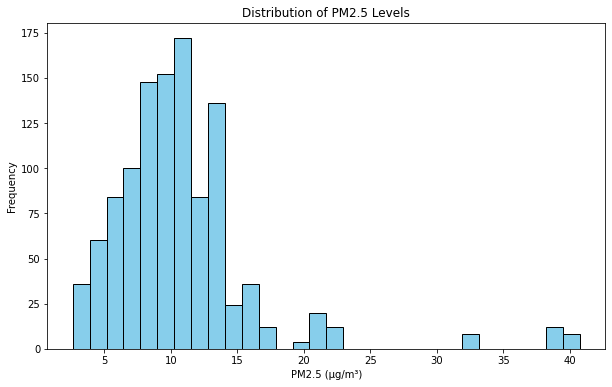

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_pm['arithmetic_mean'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Levels')
plt.show()

<Figure size 864x432 with 0 Axes>

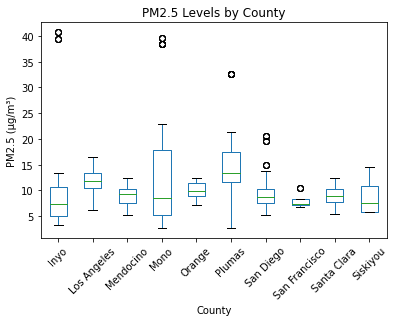

In [27]:
plt.figure(figsize=(12, 6))
filtered_pm.boxplot(column='arithmetic_mean', by='county', grid=False)
plt.xlabel('County')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 Levels by County')
plt.suptitle('')  # Remove the default subtitle
plt.xticks(rotation=45)
plt.show()

<Figure size 864x432 with 0 Axes>

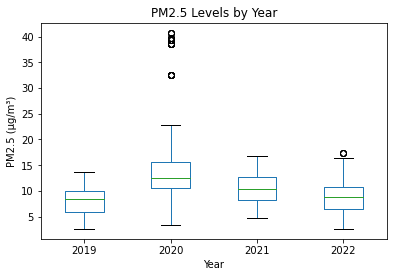

In [28]:
plt.figure(figsize=(12, 6))
filtered_pm.boxplot(column='arithmetic_mean', by='year', grid=False)
plt.xlabel('Year')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 Levels by Year')
plt.suptitle('')
plt.show()

county
Los Angeles      324
Inyo             200
San Diego        180
Mono             128
Plumas            72
Orange            64
Santa Clara       64
Mendocino         36
Siskiyou          24
San Francisco     16
Name: count, dtype: int64


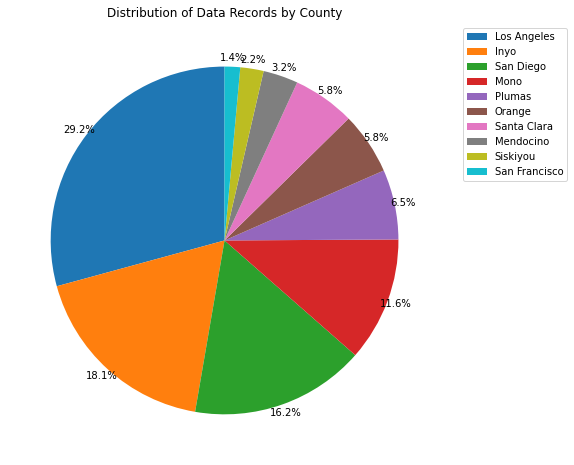

In [29]:
# pie chart of how many records each county has
county_counts = filtered_pm['county'].value_counts()

# show counts for each county
print(county_counts)

plt.figure(figsize=(8,8))
plt.pie(county_counts, autopct='%1.1f%%', startangle=90, pctdistance=1.05)
plt.title('Distribution of Data Records by County')
plt.legend(county_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()
# we can fix the formatting of the pie chart later

### Population Plots

In [30]:
pop_df.head()

,county,STNAME,arithmetic_mean,year,POPESTIMATE
0,Orange,California,9.402305,2019,3175692
1,Orange,California,9.402305,2019,3175692
2,Orange,California,9.402305,2019,3175692
3,Orange,California,9.402305,2019,3175692
4,Orange,California,7.139640,2019,3175692


In [ ]:
years = sorted(pop_df['year'].unique())
fig, axes = plt.subplots(2,2, figsize=(15, 15))
axes = axes.flatten()

for i, yr in enumerate(years):
    subset = pop_df[pop_df['year'] == yr]
    axes[i].scatter(subset['POPESTIMATE'], subset['arithmetic_mean'], alpha=0.7)
    axes[i].set_title(f'Population vs. PM2.5, Year: {yr}')
    axes[i].set_xlabel('Population Estimate')
    axes[i].set_ylabel('Average PM2.5 (µg/m³)')

plt.tight_layout()
plt.show()

In [32]:
county_pm25_avg = filtered_pm.groupby('county')['arithmetic_mean'].mean().reset_index()
county_pm25_avg

,county,arithmetic_mean
0,Inyo,8.839662
1,Los Angeles,11.837702
2,Mendocino,8.999711
3,Mono,12.941654
4,Orange,10.025068
5,Plumas,15.662215
6,San Diego,9.311438
7,San Francisco,8.040952
8,Santa Clara,9.087330
9,Siskiyou,8.709729


In [33]:
county_pm25_pop = pop_df.groupby('county').agg({'arithmetic_mean': 'mean', 'POPESTIMATE': 'mean'}).reset_index()
county_pm25_pop['pm_per_capita'] = county_pm25_pop['arithmetic_mean'] / county_pm25_pop['POPESTIMATE']
county_pm25_pop.head()

,county,arithmetic_mean,POPESTIMATE,pm_per_capita
0,Inyo,8.839662,1.877890e+04,0.000471
1,Los Angeles,11.837702,9.899552e+06,0.000001
2,Mendocino,8.999711,8.986611e+04,0.000100
3,Mono,12.941654,1.338959e+04,0.000967
4,Orange,10.025068,3.168045e+06,0.000003


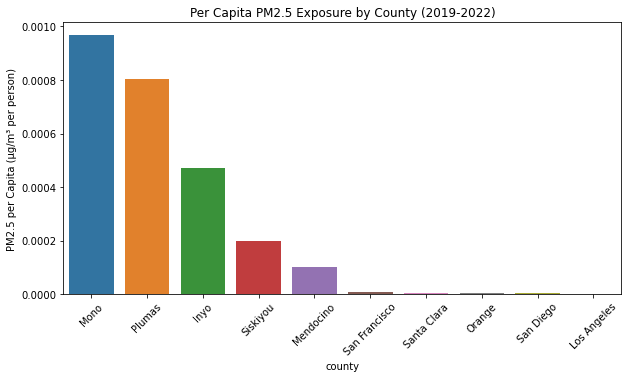

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(data=county_pm25_pop, x='county', y='pm_per_capita', order=county_pm25_pop.sort_values('pm_per_capita', ascending=False)['county'])
plt.xticks(rotation=45)
plt.ylabel('PM2.5 per Capita (µg/m³ per person)')
plt.title('Per Capita PM2.5 Exposure by County (2019-2022)')
plt.show()

### GeoSpatial Plots

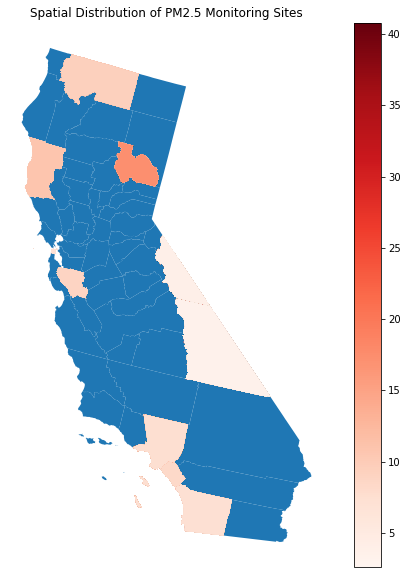

In [35]:
gdf = gpd.GeoDataFrame(filtered_pm)
gdf = gdf.to_crs(epsg=5070)

fig, ax = plt.subplots(figsize=(10, 10))
cali_county_shp.plot(ax=ax)
gdf.plot(ax=ax, column='arithmetic_mean', cmap='Reds', markersize=30, alpha=0.7, legend=True)

ax.set_title('Spatial Distribution of PM2.5 Monitoring Sites')
ax.set_axis_off()
plt.show()

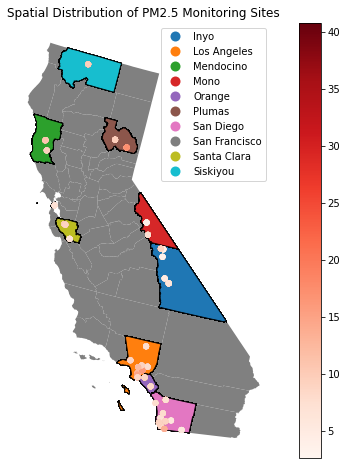

In [36]:
# convert the dataframe to a GeoDataFrame using latitude and longitude
geometry = [Point(xy) for xy in zip(filtered_pm['longitude'], filtered_pm['latitude'])]
gdf = gpd.GeoDataFrame(filtered_pm, geometry=geometry, crs='EPSG:4326')

gdf = gdf.to_crs(epsg=5070)
fig, ax = plt.subplots(figsize=(10, 8))
cali_county_shp.plot(ax=ax, color='gray')
filtered_pm.plot(ax=ax, column='county', linewidth=0.8, edgecolor='black', legend=True)
gdf.plot(ax=ax, column='arithmetic_mean', cmap='Reds', markersize=25, alpha=0.7, legend=True)

ax.set_title('Spatial Distribution of PM2.5 Monitoring Sites')
ax.set_axis_off()
plt.show()

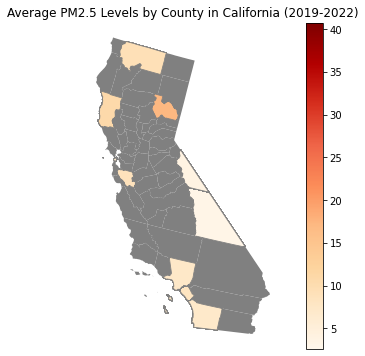

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
cali_county_shp.plot(ax=ax, color='gray')
filtered_pm.plot(column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='gray', legend=True, ax=ax)
ax.set_title('Average PM2.5 Levels by County in California (2019-2022)')
ax.set_axis_off()
plt.show()


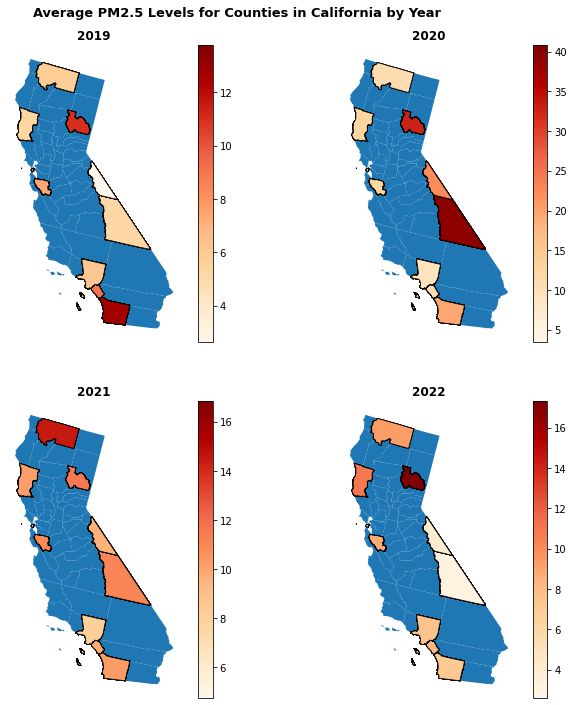

In [38]:
fig, ax1 = plt.subplots(2,2, figsize=(12, 12))
ax1 = ax1.flatten()
# plots county lines and take of axes
ax1[0].set_axis_off()
ax1[1].set_axis_off()
ax1[2].set_axis_off()
ax1[3].set_axis_off()

cali_county_shp.plot(ax=ax1[0])
cali_county_shp.plot(ax=ax1[1])
cali_county_shp.plot(ax=ax1[2])
cali_county_shp.plot(ax=ax1[3])

# plot 2019 PM2.5 data
gdf_pm_2019 = filtered_pm.loc[filtered_pm['year'] == 2019]
gdf_pm_2019.plot(ax=ax1[0], column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
ax1[0].set_title('2019', fontweight='bold')

# plot 2020 PM2.5 data
gdf_pm_2020 = filtered_pm.loc[filtered_pm['year'] == 2020]
gdf_pm_2020.plot(ax=ax1[1], column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
ax1[1].set_title('2020', fontweight='bold')

# plot 2021 PM2.5 data
gdf_pm_2021 = filtered_pm.loc[filtered_pm['year'] == 2021]
gdf_pm_2021.plot(ax=ax1[2], column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
ax1[2].set_title('2021', fontweight='bold');

# plot 2022 PM2.5 data
gdf_pm_2022 = filtered_pm.loc[filtered_pm['year'] == 2022]
gdf_pm_2022.plot(ax=ax1[3], column='arithmetic_mean', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
ax1[3].set_title('2022', fontweight='bold');

# Titles and labels
plt.suptitle('Average PM2.5 Levels for Counties in California by Year', fontweight='bold', y=.925, fontsize=13);

plt.subplots_adjust(wspace=0)

In [39]:
# define PM2.5 level categories based on EPA AQI breakpoints
pm25_levels = pd.DataFrame({
    'PM2.5_Concentration_µg/m³': ['0.0 – 12.0', '12.1 – 35.4', '35.5 – 55.4', '55.5 – 150.4', '150.5 – 250.4', '250.5+'],
    'AQI_Category': ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'],
    'Health_Concern_Level': [
        'Little to no risk',
        'Some risk for sensitive groups',
        'Increased risk for sensitive individuals',
        'Risk for the general population',
        'Health warnings issued',
        'Emergency conditions'
    ]
})

display(pm25_levels)

,PM2.5_Concentration_µg/m³,AQI_Category,Health_Concern_Level
0,0.0 – 12.0,Good,Little to no risk
1,12.1 – 35.4,Moderate,Some risk for sensitive groups
2,35.5 – 55.4,Unhealthy for Sensitive Groups,Increased risk for sensitive individuals
3,55.5 – 150.4,Unhealthy,Risk for the general population
4,150.5 – 250.4,Very Unhealthy,Health warnings issued
5,250.5+,Hazardous,Emergency conditions
